In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/266/HIFIGAN')

Input Text: He had been in the employ of a corn-chandler at Islington, and went into London with his master's cart and horse.


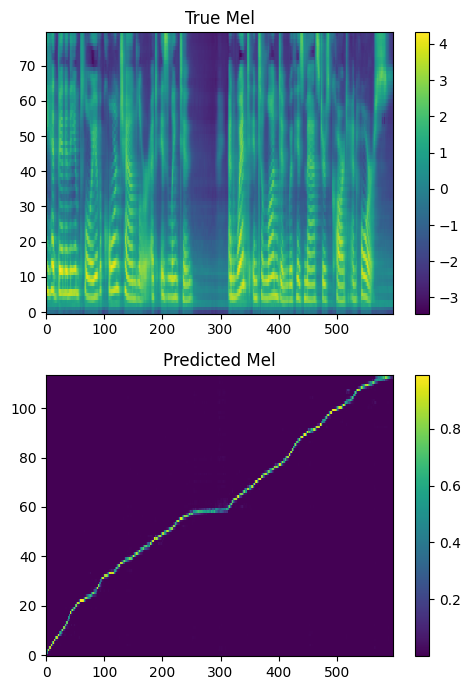

In [ ]:
import pandas as pd
from model import Tacotron2Config, Tacotron2
import torch
from tokenizer import Tokenizer
import matplotlib.pyplot as plt
from IPython.display import Audio
from dataset import AudioMelConversions

data = pd.read_csv("/content/drive/MyDrive/266/datasplit/test_metadata.csv")

config = Tacotron2Config()
model = Tacotron2(config)
tokenizer = Tokenizer()
a2m = AudioMelConversions()

state_dict = torch.load('/content/drive/MyDrive/266/Tacotron2_O/work_dir/tacotron2/checkpoint_75/pytorch_model.bin', map_location=torch.device('cpu'))
model.load_state_dict(state_dict)
model.eval()

def inference(text):
    print(f"Input Text: {text}")

    tokens = tokenizer.encode(text).unsqueeze(0)
    output, alignments  = model.inference(tokens)

    fig, axes = plt.subplots(2, 1, figsize=(5, 7))
    im0 = axes[0].imshow(output[0].T, aspect='auto', origin='lower', interpolation='none')
    axes[0].set_title("True Mel")
    fig.colorbar(im0, ax=axes[0])

    im1 = axes[1].imshow(alignments[0].T, aspect='auto', origin='lower', interpolation='none')
    axes[1].set_title("Predicted Mel")
    fig.colorbar(im1, ax=axes[1])

    plt.tight_layout()
    plt.show()

    audio = a2m.mel2audio(output[0].T, do_denorm=True)
    display(Audio(audio, rate=22050))

inference(data["normalized_transcript"][0])

Input Text: Generative artificial intelligence is an interesting subject.


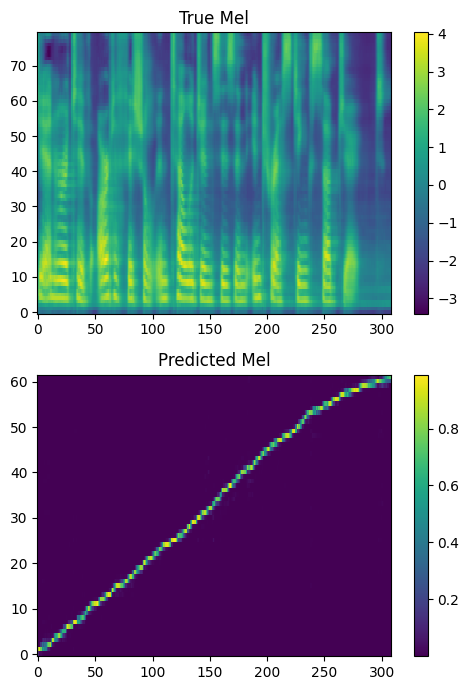

In [ ]:
inference("Generative artificial intelligence is an interesting subject.")

In [ ]:
!GIT_LFS_SKIP_SMUDGE=1 pip install git+https://github.com/sarulab-speech/UTMOSv2.git

  Cloning https://github.com/sarulab-speech/UTMOSv2.git to /tmp/pip-req-build-5g41adrc
  Running command git clone --filter=blob:none --quiet https://github.com/sarulab-speech/UTMOSv2.git /tmp/pip-req-build-5g41adrc
  Resolved https://github.com/sarulab-speech/UTMOSv2.git to commit 8e9ae07796f23c76d7990a014b70a25685dc06e0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for utmosv2: filename=utmosv2-1.2.1-py3-none-any.whl size=77810 sha256=5821fe8ecb12f68000575792283447977030a2b9237b37227840da69c6605e1b
  Stored in directory: /tmp/pip-ephem-wheel-cache-r0gcrgrj/wheels/59/c9/43/348b910ebc4fc7b58e891b26128a034f4dfd40df8bf938faa0
Successfully built utmosv2


In [ ]:
import utmosv2

model = utmosv2.create_model(pretrained=True)

mos = model.predict(input_path="gl.wav")
print(f"Predicted MOS: {mos}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/159 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

/usr/local/lib/python3.12/dist-packages/transformers/configuration_utils.py:335: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/380M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/86.5M [00:00<?, ?B/s]

Done.
Loaded checkpoint from /root/.cache/utmosv2/models/fusion_stage3/fold0_s42_best_model.pth


Predicting:   0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.12/dist-packages/utmosv2/_core/model/_common.py:220: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Predicting: 100%|██████████| 1/1 [00:22<00:00, 22.42s/it]

Predicted MOS: 1.9189453125


In [ ]:
mos = model.predict(input_path="hifigan.wav")
print(f"Predicted MOS: {mos}")

Predicting: 100%|██████████| 1/1 [00:02<00:00,  2.72s/it]

Predicted MOS: 3.5390625
